# Unit 5 - Financial Planning

In [88]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [47]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [48]:
# Set current amount of crypto assets
# YOUR CODE HERE!
btc_value = 1.2
my_eth = 5.3


In [49]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_url = btc_url + "?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_url = eth_url  + "?format=json"

In [50]:
# Fetch current BTC price
# YOUR CODE HERE!
# Execute create deck url

response_data_btc = requests.get(btc_url).json()

#response_data_btc
print(json.dumps(response_data_btc, indent=4)) 

# Fetch current ETH price
response_data_eth = requests.get(eth_url).json()

#response_data_eth
response_data_eth
print(json.dumps(response_data_eth, indent=4)) 

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19149162,
            "total_supply": 19149162,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 22364.0,
                    "volume_24h": 44261994767,
                    "market_cap": 427893465199,
                    "percentage_change_1h": 0.0988535484369936,
                    "percentage_change_24h": 2.42179284049502,
                    "percentage_change_7d": 13.0334461386658,
                    "percent_change_1h": 0.0988535484369936,
                    "percent_change_24h": 2.42179284049502,
                    "percent_change_7d": 13.0334461386658
                }
            },
            "last_updated": 1663027719
        }
    },
    "metadata": {
        "timestamp": 1663027719,
        "num_crypt

In [51]:
response_data_btc['data']['1']['quotes']['USD']['price']
response_data_eth['data']['1027']['quotes']['USD']['price']

1713.7

In [52]:
# Compute current value of my crypto
my_btc_value = response_data_btc['data']['1']['quotes']['USD']['price']
my_eth_value = response_data_eth['data']['1027']['quotes']['USD']['price']


crypto_value = my_btc_value ++ my_eth_value
crypto_value

crypto_data = {
    "crypto": [crypto_value]
}


# Set the tickers
tickers = ["Crypto"]

# Create the shares DataFrame with `tickers` as index
df_crypto = pd.DataFrame(crypto_data, index=tickers)



# Display sample data
df_crypto

# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

,crypto
Crypto,24077.7


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [53]:
# Set current amount of shares
my_agg = 200
my_spy = 50

shares_data = {
    "shares": [200, 320]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares 

,shares
AGG,200
SPY,320


In [54]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [55]:
# Format current date as ISO format

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2022-08-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-08-22 04:00:00+00:00  101.82  101.8900  101.5150  101.55  7132742   
2022-08-23 04:00:00+00:00  101.54  101.9671  101.4000  101.51  6531916   
2022-08-24 04:00:00+00:00  101.35  101.3950  101.1500  101.24  5397673   
2022-08-25 04:00:00+00:00  101.33  101.8700  101.2426  101.80  8184169   
2022-08-26 04:00:00+00:00  101.67  101.8500  101.4200  101.61  4402402   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2022-08-22 04:00:00+00:00       24710  101.702316  417.04  417.2300  412.40   
2022-08-23 04:00:00+00:00       21473  101.686417  412.96  415.4200  411.77   
2022-08-24 04:00:00+00:00       19881  101.259133  412.10  415.1101  411.39   
2022-08-25 04:00:00+00:00       22707  101.529620  415.27  419.5600  414.09   
2022-08-26 04:00:00+00:00       19101  101.647650  419.46  419.9600  405.25   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-08-22 04:00:00+00:00  413.35   77604197      484052  415.048519  
2022-08-23 04:00:00+00:00  412.35   48952606      389397  413.095826  
2022-08-24 04:00:00+00:00  413.67   48983049      334281  413.383226  
2022-08-25 04:00:00+00:00  419.51   48816114      338000  416.816182  
2022-08-26 04:00:00+00:00  405.31  102743389      669874  410.796242

In [56]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.cumsum().dropna()

# Display sample data
df_daily_returns.head(10)

,AGG,SPY
2022-08-22,101.55,413.35
2022-08-23,203.06,825.70
2022-08-24,304.30,1239.37
2022-08-25,406.10,1658.88
2022-08-26,507.71,2064.19


In [75]:
# Pick AGG and SPY close prices
agg_price = df_daily_returns["AGG"][1].astype(float)
spy_price = df_daily_returns["SPY"][1].astype(float)



In [79]:
# Compute the current value of shares
# Compute the current value in dollars of the stock portfolio
agg_price = agg_price * df_shares.loc["AGG"]["shares"]
spy_price = spy_price * df_shares.loc["SPY"]["shares"]



In [77]:
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_price:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_price:0.2f}")

The current value of the 200 AGG shares is $40612.00
The current value of the 320 SPY shares is $264224.00


### Savings Health Analysis

In [80]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_savings = pd.DataFrame(agg_price,spy_price)
df_savings.head()

# Drop the time component of the date
#df_total_shares = df_shares.loc['AGG']['shares']


# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
#display(df_savings)

ValueError: DataFrame constructor not properly called!

In [60]:
# Plot savings pie chart
# YOUR CODE HERE!

In [61]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [62]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [86]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [89]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 1000

MC_spy_agg = MCSimulation(
    portfolio_data = df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [90]:
# Printing the simulation input data
MC_spy_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/thehalpins/FinTech_instructionals/week5/code/Instructions4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999521,0.999104,0.985599,1.000909,0.998879,1.000579,0.998869,1.007673,1.003646,1.000766,...,1.000696,1.005151,1.003120,0.983145,1.007501,1.003180,1.004952,0.999632,0.997820,0.997468
2,1.017151,0.993072,0.985190,0.998092,0.999735,1.010428,0.995098,1.020440,0.993541,0.992001,...,0.997169,1.009414,1.008880,0.985994,1.017962,0.996263,1.005649,1.001460,0.994311,0.992992
3,1.023860,1.005956,0.982686,1.002663,0.994176,1.015907,0.992059,1.016006,0.994872,0.990578,...,0.992939,1.008180,1.012430,0.986917,1.015154,1.009016,1.006921,1.000479,0.984894,0.988579
4,1.015075,1.000981,0.986220,1.001098,1.002628,1.012523,0.996148,1.011296,0.995905,0.995497,...,0.997388,1.000282,1.014565,0.990224,1.009733,1.000505,1.004104,1.004887,0.991927,0.986203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.490835,1.098661,1.376349,1.103640,1.467306,1.817006,1.488083,1.506315,1.602349,1.675378,...,1.431152,0.892463,1.800307,1.289768,0.875826,2.043330,1.106322,1.549063,1.226404,1.601990
1257,1.494235,1.108418,1.386817,1.107021,1.477715,1.804339,1.491179,1.520377,1.623888,1.682217,...,1.427447,0.898197,1.817167,1.298838,0.878162,2.023752,1.099992,1.528980,1.230925,1.606187
1258,1.501320,1.108883,1.393992,1.112210,1.479291,1.814379,1.497124,1.526774,1.627559,1.680976,...,1.453577,0.904755,1.814316,1.306057,0.884780,2.036644,1.103619,1.535424,1.226007,1.613830
1259,1.491072,1.110603,1.381630,1.099613,1.474129,1.821065,1.505791,1.519436,1.610769,1.667922,...,1.449211,0.901933,1.802846,1.297692,0.893240,2.062813,1.108816,1.513958,1.211487,1.633003


In [91]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_spy_agg.simulated_return.mean(axis=1)),
    "median": list(MC_spy_agg.simulated_return.median(axis=1)),
    "min": list(MC_spy_agg.simulated_return.min(axis=1)),
    "max": list(MC_spy_agg.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000309,1.000510,0.975296,1.016739
2,1.000501,1.000555,0.972051,1.028514
3,1.000997,1.000906,0.969395,1.035247
4,1.001600,1.001368,0.961270,1.041058


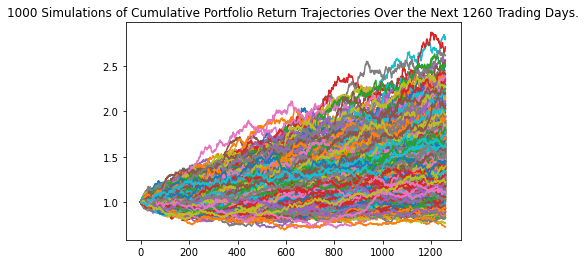

In [94]:
# Plot simulation outcomes

line_plot = MC_spy_agg.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC Spy Agg over 5 years", bbox_inches="tight")




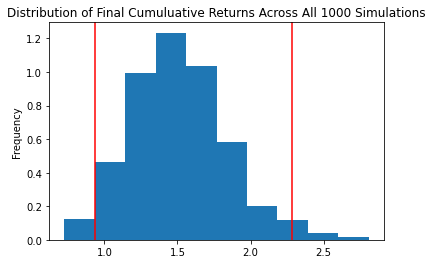

In [96]:
# Plot probability distribution and confidence intervals
dist_plot = MC_spy_agg.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC Spy Agg 5 year dist',bbox_inches='tight')

### Retirement Analysis

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_spy_agg.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               1.509126
std                0.326132
min                0.725865
25%                1.282887
50%                1.487054
75%                1.713795
max                2.808712
95% CI Lower       0.933733
95% CI Upper       2.281322
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [102]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18674.65 and $45626.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [103]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28011.98 and $68439.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")